# **Importing python library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **CSV file import**

In [2]:
Heart_Disease_Dataset = pd.read_csv('heart.csv')

# **Showing first few rows of the dataset**

In [3]:
Heart_Disease_Dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data Pre-Processing**

## **Information of The Dataset**

In [4]:
Heart_Disease_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **Shape of The Dataset**

In [5]:
Heart_Disease_Dataset.shape

(1025, 14)

## **Check columns list and missing values**

In [6]:
Heart_Disease_Dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Get unique count for each variable**

In [7]:
Heart_Disease_Dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## **Check variable data types**

In [8]:
Heart_Disease_Dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **Check for duplicate rows**

In [9]:
print("\nDuplicate rows count:", Heart_Disease_Dataset.duplicated().sum())


Duplicate rows count: 723


## **Statistical Analysis**

In [10]:
print("\nSummary statistics:")
Heart_Disease_Dataset.describe()


Summary statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Visualisations**

## **Visualisation 1: Distribution of Target Variable**

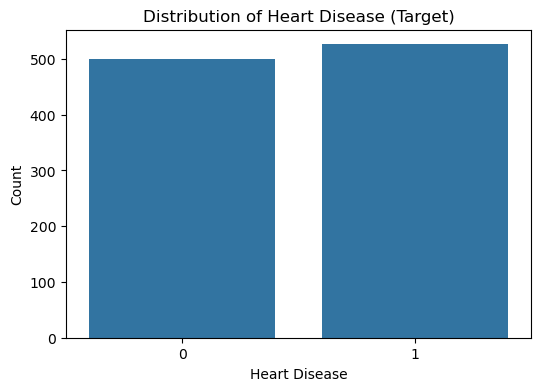

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=Heart_Disease_Dataset)
plt.title('Distribution of Heart Disease (Target)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

## **Visualisation 2: Correlation Heatmap**

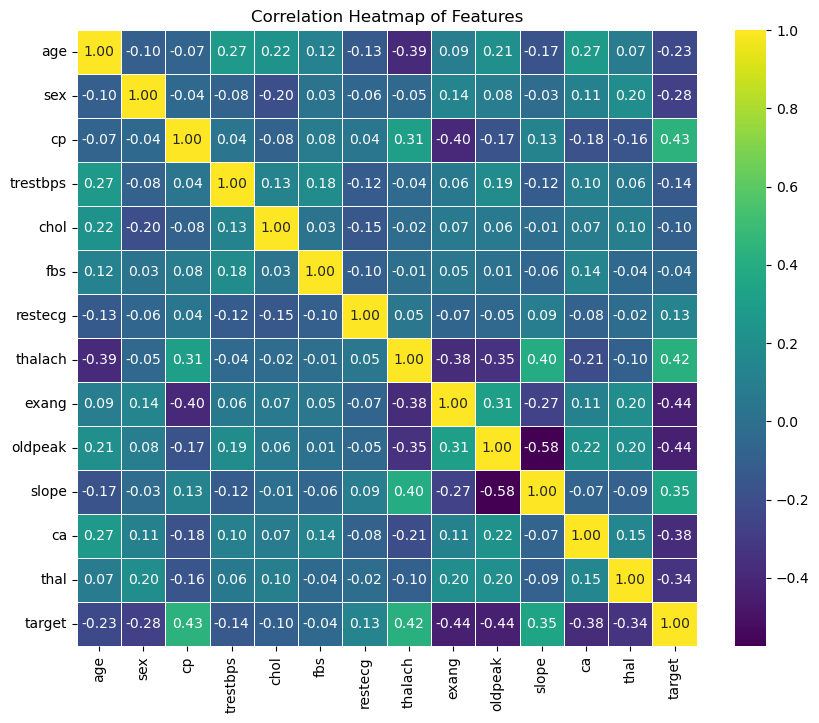

In [12]:
plt.figure(figsize=(10, 8))
corr = Heart_Disease_Dataset.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## **Visualisation 3: Age Distribution**

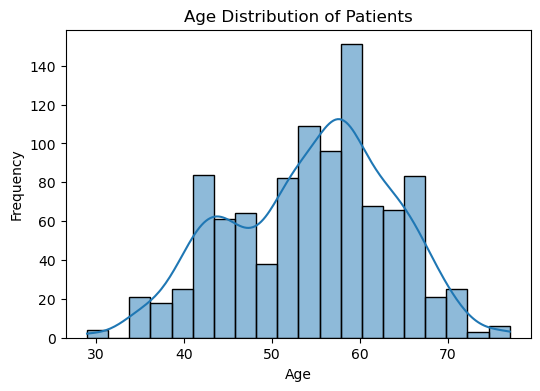

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(Heart_Disease_Dataset['age'], kde=True, bins=20)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## **Visualization 4: Boxplot for Cholesterol vs Target**

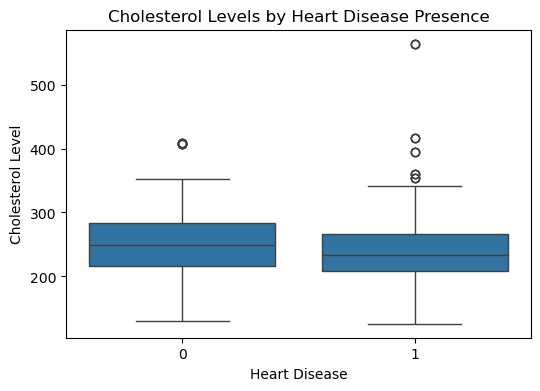

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='chol', data=Heart_Disease_Dataset)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level')
plt.show()

# **Model Creation and Evaluation**

## **Splitting the data into features and target**

In [15]:
X = Heart_Disease_Dataset.drop('target', axis=1)
y = Heart_Disease_Dataset['target']

## **Splitting the data into 80% training and 20% testing**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Scaling**

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model 1: Random Forest Classifier**

### **Build the Model**

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### **Predicting on the test set**

In [19]:
rf_pred = rf_model.predict(X_test_scaled)

### **Classification Report**

In [20]:
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### **Heatmap of Confusion Matrix**

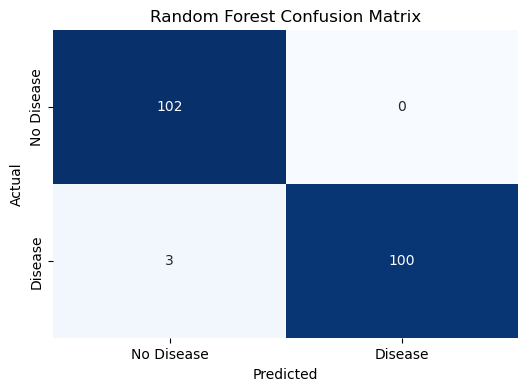

In [21]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Model 2: Decision Tree Classifier**

### **Build the Model**

In [22]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### **Predicting on the test set**

In [23]:
dt_pred = dt_model.predict(X_test_scaled)

### **Classification Report**

In [24]:
print("Decision Tree Classifier Report:\n", classification_report(y_test, dt_pred))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### **Heatmap of Confusion Matrix**

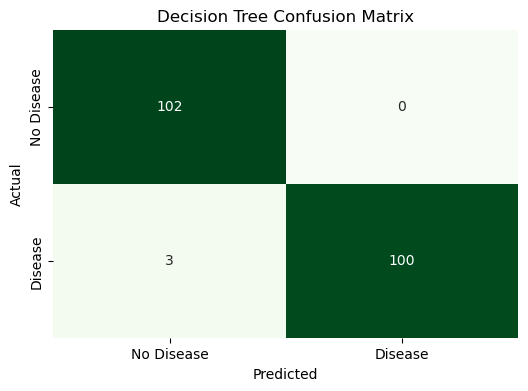

In [25]:
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Model 3: K-Nearest Neighbors (KNN) Classifier**

### **Build the Model**

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### **Predicting on the test set**

In [27]:
knn_pred = knn_model.predict(X_test_scaled)

### **Classification Report**

In [28]:
print("KNN Classifier Report:\n", classification_report(y_test, knn_pred))

KNN Classifier Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



### **Heatmap of Confusion Matrix**

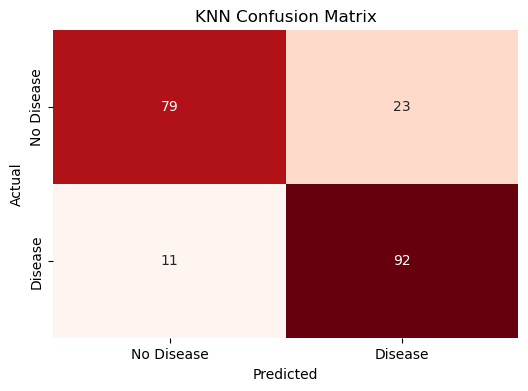

In [29]:
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Model 4: Gradient Boosting Classifier**

### **Build the Model**

In [30]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

### **Predicting on the test set**

In [31]:
gb_pred = gb_model.predict(X_test_scaled)

### **Classification Report**

In [32]:
print("Gradient Boosting Classifier Report:\n", classification_report(y_test, gb_pred))

Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



### **Heatmap of Confusion Matrix**

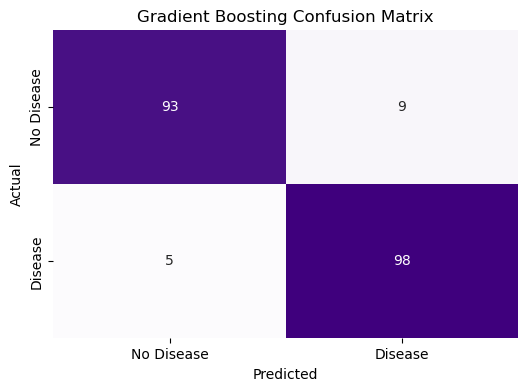

In [33]:
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Purples', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model Comparison**

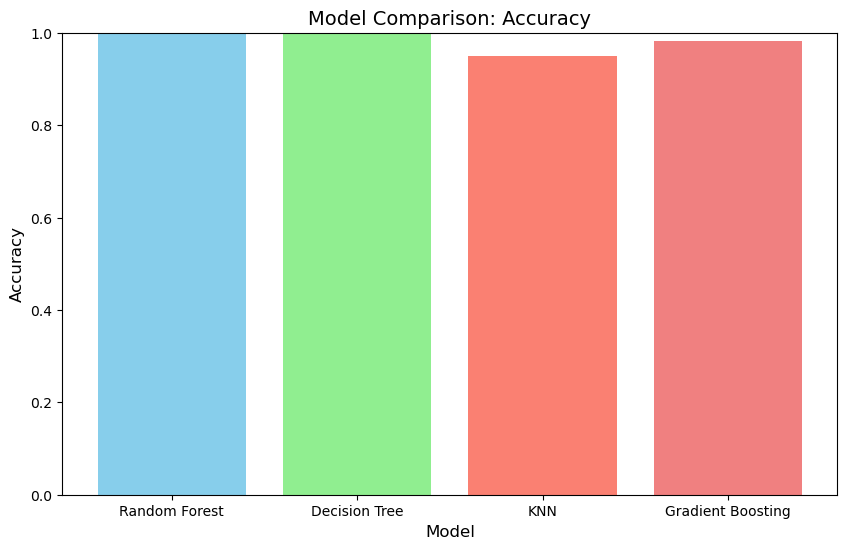

In [34]:
models = ['Random Forest', 'Decision Tree', 'KNN', 'Gradient Boosting']
accuracies = [
    rf_model.score(X_train_scaled, y_train),
    dt_model.score(X_train_scaled, y_train),
    knn_model.score(X_train_scaled, y_train),
    gb_model.score(X_train_scaled, y_train)
]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title('Model Comparison: Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.show()